# Sparkfun OLA Artemis IMU Analysis

In order to analzye the sensor calibration and heading derived from the Artemis IMU, we collected data from ROS topics /imu and our custom /yaw topic to analyze under the following conditions. The IMU was kept flat in the x, y plane and rotated about the z axis several times. This test would allow us to ensure the yaw values derived by the AHRS calculations and the linear acceleration were reliable and accurate measurements that can be used by the navigation and GPS subteams.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal

In [4]:
imu_data = pd.read_csv('../data/clean/imu_data.csv')
yaw_data = pd.read_csv('../data/clean/yaw_data.csv')

In [17]:
imu_data = imu_data[['Time', 'orientation.x', 'orientation.y', 'orientation.z', 'orientation.w', 'linear_acceleration.x', 'linear_acceleration.y',
       'linear_acceleration.z']]

In [18]:
def reset_bag_timescale(df):
    
    df['Time'] = df['Time'] - df['Time'].min()

In [21]:
reset_bag_timescale(imu_data)
reset_bag_timescale(yaw_data)

In [22]:
imu_data.head()

,Time,orientation.x,orientation.y,orientation.z,orientation.w,linear_acceleration.x,linear_acceleration.y,linear_acceleration.z
0,0.000000,0.038774,-0.008478,-0.483737,0.874313,0.345987,-0.278382,10.275232
1,0.056403,0.039834,-0.010336,-0.483229,0.874526,0.337353,-0.278382,10.413895
2,0.109455,0.041478,-0.010731,-0.481084,0.875627,0.337353,-0.243424,10.710757
3,0.163694,0.040390,-0.009628,-0.480960,0.875759,0.337353,-0.243424,10.744465
4,0.226710,0.037109,-0.001504,-0.482210,0.875268,0.333380,-0.243424,10.744465


In [23]:
yaw_data.head()

,Time,yaw
0,0.000000,-57.86
1,0.056294,-57.80
2,0.109371,-57.52
3,0.163628,-57.50
4,0.227597,-57.64


In [105]:
len(imu_data)

500

## Linear Acceleration Analysis

We will analyze the distribution and trends in the acceleration to ensure the calibration of our sensor

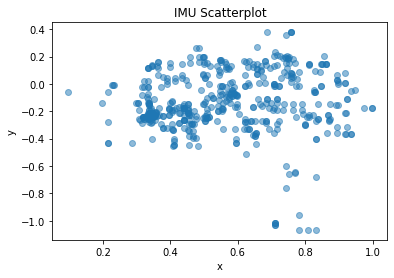

In [90]:
plt.scatter(imu_data['linear_acceleration.x'], imu_data['linear_acceleration.y'], alpha=0.5)
plt.title('IMU Scatterplot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [12]:
np.var(imu_data['linear_acceleration.x'])

0.034584565523784264

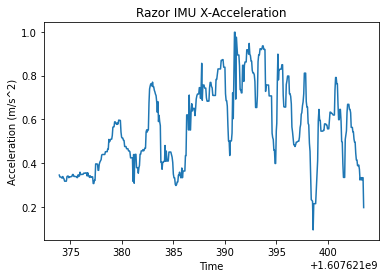

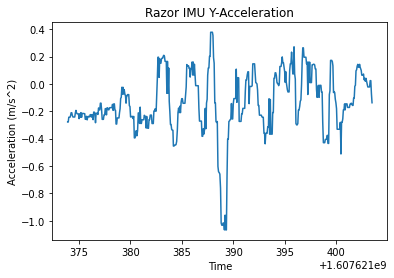

In [9]:
plt.plot(imu_data['Time'], imu_data['linear_acceleration.x'])
plt.title('IMU X-Acceleration')
plt.xlabel('Time')
plt.ylabel('Acceleration (m/s^2)')
plt.show()

plt.plot(imu_data['Time'], imu_data['linear_acceleration.y'])
plt.title('IMU Y-Acceleration')
plt.xlabel('Time')
plt.ylabel('Acceleration (m/s^2)')
plt.show()



# plt.plot(imu_data['Time'], imu_data['linear_acceleration.z'])
# plt.title('IMU Z-Acceleration')
# plt.xlabel('Time')
# plt.ylabel('Acceleration (m/s^2)')
# plt.show()

The data was collected for 30 seconds, so we will examine the acceleration over the entire time window. We are expecting the linear acceleration of the x and y axis to be around 0 because the IMU was solely rotated about the z-axis. The z-acceleration will be expected to be around 9.8m/s^2, as it is always experiencing gravitational force, but can be removed from futher consideration because our robot will only travel on flat surfaces on the ground. The X-acceleration values are fairly noisy with many fluctuations. This is satisfies our expectations and indicates that the calibration process was successful in the x-axis acceleration. Similar for y with no major outliers beyond ~1.0 m/s^2 . 

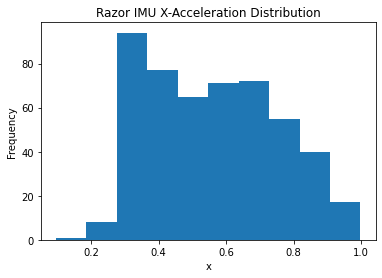

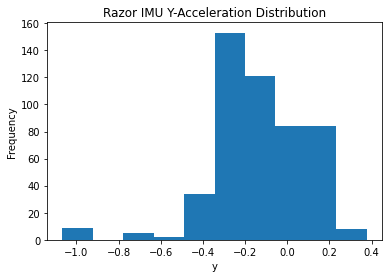

In [6]:
# plt.plot(imu_data['Time'], imu_data['linear_acceleration.y'])
# plt.title('IMU X-Acceleration')
# plt.xlabel('Time')
# plt.ylabel('Acceleration (m/s^2)')
# plt.show()

plt.hist(imu_data['linear_acceleration.x'], bins=None)
plt.title('IMU X-Acceleration Distribution')
plt.xlabel('x')
plt.ylabel('Frequency')
plt.show()

plt.hist(imu_data['linear_acceleration.y'], bins=None)
plt.title('IMU Y-Acceleration Distribution')
plt.xlabel('y')
plt.ylabel('Frequency')
plt.show()

The histogram distributions of the x and y axis further validate our previous findings. The values are centered around zero for both histograms

## Heading

#### The benefit of the using the Artmemis ROS package (by Francis Le Bars) is the inclusion of the Attitude Heading Reference System that is at the core of library. This allows us to derive orientation for the robot using the acceleration, gyroscope, and magnetometer readings in unison. However, this orientation is given in quaternions, which are [x,w,y,z] coordinates, defining a vector and rotational transformation. The heading we aim to use for the robot is the Yaw that takes into account the magnetometer readings, thus it is important to convert the quaternion values to yaw. Fortunately, ROS provides a method for converting within its transformations library. We have also written a custom publisher for the yaw value to make this data easily accesible to potential consumers. The yaw data analyzed was collected from our custom publisher.

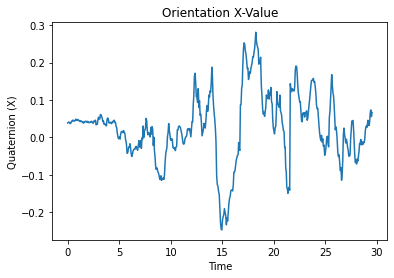

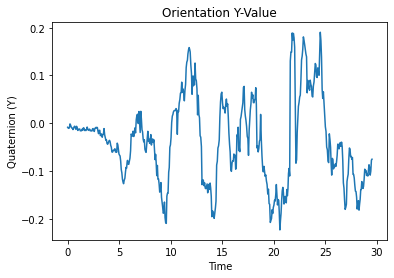

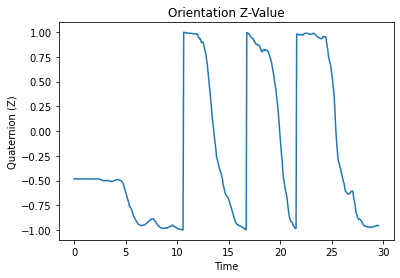

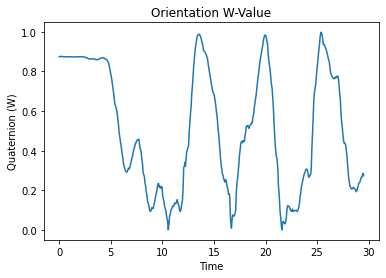

In [42]:
plt.plot(imu_data['Time'], imu_data['orientation.x'])
plt.title('Orientation X-Value')
plt.xlabel('Time')
plt.ylabel('Quaternion (X)')
plt.show()

plt.plot(imu_data['Time'], imu_data['orientation.y'])
plt.title('Orientation Y-Value')
plt.xlabel('Time')
plt.ylabel('Quaternion (Y)')
plt.show()

plt.plot(imu_data['Time'], imu_data['orientation.z'])
plt.title('Orientation Z-Value')
plt.xlabel('Time')
plt.ylabel('Quaternion (Z)')
plt.show()

plt.plot(imu_data['Time'], imu_data['orientation.w'])
plt.title('Orientation W-Value')
plt.xlabel('Time')
plt.ylabel('Quaternion (W)')
plt.show()

#### Yaw Data

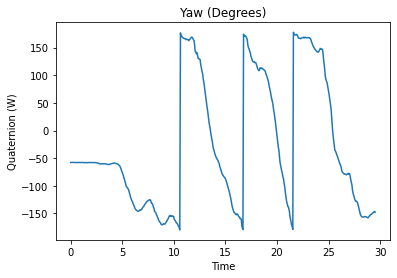

In [27]:
plt.plot(yaw_data['Time'], yaw_data['yaw'])
plt.title('Yaw (Degrees)')
plt.xlabel('Time')
plt.ylabel('Quaternion (W)')
plt.show()

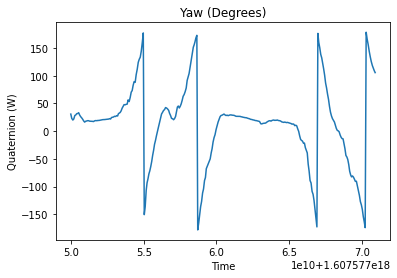

In [40]:
plt.plot(y['rosbagTimestamp'], y['yaw'])
plt.title('Yaw (Degrees)')
plt.xlabel('Time')
plt.ylabel('Quaternion (W)')
plt.show()